___
# Exercício: Revisão de alguns tópicos Pré Avaliação Intermediária
___

## Aula 13

___
Carregando algumas bibliotecas:

In [4]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

___
<div id="indice"></div>

## Índice

- [PERFOMANCE DE ESTUDANTES EM EXAMES](#students)
    - [Base de dados e Dicionário das variáveis](#dados)
    - [Leitura e Preparo da base de dados](#preparo)
    - [EXERCÍCIO 1](#ex1) 
        - [item (a)](#ex1a)
        - [item (b)](#ex1b) 
        - [item (c)](#ex1c) 

<br>

- [EXERCÍCIO 2](#ex2) 
    - [item (a)](#ex2a)
    - [item (b)](#ex2b) 
    - [item (c)](#ex2c) 

<br>

- [EXERCÍCIO 3](#ex3) 
    - [item (a)](#ex3a)
    - [item (b)](#ex3b) 
    - [item (c)](#ex3c) 
<br>

[RESPOSTAS](#resp)

___
<div id="students"></div>

### PERFORMANCE DE ESTUDANTES EM EXAMES

<div id="dados"></div>

### Base de dados e Dicionário das variáveis:

A base de dados foi extraída da plataforma [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams) intitulado “Students Performance in Exams”, cujo objetivo principal é verificar a performance do estudante considerando seu *background*. Ainda, para essa avaliação, a base de dados original passou por algumas transformações, como acréscimo de novas variáveis.

Essa base de dados possui informação de $1.000$ estudantes.

As variáveis apresentadas na base de dados `StudentsPerformance.csv` são:
 * `gender`: categozido em ['female', 'male'];
 * `race/ethnicity`: categorizado em ['group A', 'group B', 'group C', 'group D', 'group E'];
 * `parental level of education`: categorizado em ['some high school', 'high school', 'some college', 'associate's degree', 'bachelor's degree', 'master's degree'], respeitando essa ordem natural;
 * `lunch`: categorizado em ['free/reduced', 'standard'];
 * `test preparation course`: categorizado em ['completed', 'none'];
 * `math score`: nota obtida em matemática, com valor de $0$ a $100$;
 * `reading score`: nota obtida em leitura, com valor de $0$ a $100$; e
 * `writing score`: nota obtida em escrita, com valor de $0$ a $100$.
 
<br> 

Ainda, foram criadas as seguintes variáveis a partir das notas em cada prova:
 * `Xm`: se a nota de matemática for >= 80, vale 1; caso contrário, vale 0;
 * `Xr`: se a nota de leitura for >= 80, vale 1; caso contrário, vale 0;
 * `Xw`: se a nota de escrita for >= 80, vale 1; caso contrário, vale 0;
 * `Performance`: é definida pela soma de Xm, Xr e Xw. Assim, por exemplo, se `Perfomance` para um estudante for igual a 2, então esse estudante teve score >= 80 nas duas dessas três provas; e de forma análoga para demais caso.
 
Essas variáveis serão criadas rodando alguns códigos a seguir:

<div id="preparo"></div>

### Leitura e Preparo da base de dados

**IMPORTANTE:** Por favor, rodem todos os comandos a seguir antes de chegarno enunciado do Exercício 1.

In [5]:
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\Eduardo Monteiro\Desktop\CDados\aula13


In [6]:
filename = 'StudentsPerformance.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Parece que o arquivo StudentsPerformance.csv está na mesma pasta do notebook da avaliação, yay!



In [7]:
# Carregando os dados
dados = pd.read_csv('StudentsPerformance.csv')

In [8]:
# Transforma as cinco primeiras colunas da base de dados como categóricas
dados.iloc[:,0:5]=dados.iloc[:,0:5].astype('category')

# Faz apenas essa ser ordinal respeitando a ordem das categorias definidas em categories
dados['parental level of education'] = pd.Categorical(dados['parental level of education'], 
                                                      categories=['some high school', 'high school',
                                                                  'some college',
                                                                  "associate's degree","bachelor's degree","master's degree"],
                                                      ordered=True)

# Visualização das categorias dessas variáveis
(lambda mostra_categorias: list(map(lambda x: dados.iloc[:,x].cat.categories,
                                    mostra_categorias)))([0,1,2,3,4])

[Index(['female', 'male'], dtype='object'),
 Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object'),
 Index(['some high school', 'high school', 'some college', 'associate's degree',
        'bachelor's degree', 'master's degree'],
       dtype='object'),
 Index(['free/reduced', 'standard'], dtype='object'),
 Index(['completed', 'none'], dtype='object')]

In [9]:
# Quantifica como 1, se notas >= 80; caso contrário, como 0
umzero = lambda x: 1 if x >= 80 else 0
dados['Xm'] = dados['math score'].apply(umzero)
dados['Xr'] = dados['reading score'].apply(umzero)
dados['Xw'] = dados['writing score'].apply(umzero)

In [10]:
# Performance: número de provas com score >= 80 entre as 3 provas avaliadas
dados['Performance'] = dados.iloc[:,8:11].sum(axis=1)

In [11]:
# Conteúdo das 5 primeiras linhas da base de dados
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Xm,Xr,Xw,Performance
0,female,group B,bachelor's degree,standard,none,72,72,74,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,0,1,1,2
2,female,group B,master's degree,standard,none,90,95,93,1,1,1,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,0,0,0,0


In [12]:
dados.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
Xm                                int64
Xr                                int64
Xw                                int64
Performance                       int64
dtype: object

[Voltar ao Índice](#indice) 

___
<div id="ex1"></div>

### EXERCÍCIO 1:

Num contexto teórico, seja **`Y` o número de provas que um aluno obteve score maior ou igual a 80 entre as 3 provas avaliadas**. Já na base de dados, os resultados empíricos dessa contagem estão na coluna `Performance`, a qual foi construída somando as colunas `Xm`, `Xr` e `Xw`.

Assuma que essa variável **`Y` possa ser ajustada pelo modelo binomial com parâmetros $n=3$ e $p=0.21$**, sendo $n$ igual ao total de provas que cada aluno é submetido; e $p$ a probabilidade de um aluno ter score pelo menos 80 em uma prova qualquer.

**Responda:**

<div id="ex1a"></div>

**(a)** 
Como discutido em sala, uma das suposições da Binomial é ter independência entre as tentativas, ou seja, aqui seria independência entre as notas obtidas por cada aluno.

Verifique, por meio de **medidas numéricas** adequada, se essas notas obtidas nas três provas podem ser consideradas independentes entre si. **Interprete os resultados**.

In [13]:
dados.Xm.corr(dados.Xr)

0.5563241159662096

In [14]:
dados.Xm.corr(dados.Xw)

0.4879210138781179

In [15]:
dados.Xw.corr(dados.Xr)

0.7771142200184503

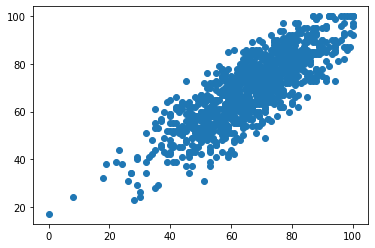

In [16]:
plt.scatter(dados['math score'], dados['reading score'])

**Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos itens deste exercício!**

<div id="ex1b"></div>

**(b)** 
Num contexto teórico, seja **`Y` o número de provas que um aluno obteve score maior ou igual a 80 entre as 3 provas avaliadas**. Assuma que **`Y` segue um binomial com parâmetros $n=3$ e $p=0.21$**, sendo $n$ igual ao total de provas que cada aluno é submetido; e $p$ a probabilidade de um aluno ter score pelo menos 80 em uma prova qualquer.

Na base de dados, os resultados empíricos dessa contagem estão na coluna **`Performance`**.

Faça:
 * Considerando o modelo teórico, calcule a probabilidade de cada valor que essa variável `Y` pode assumir. Mostre cada uma dessas probabilidades teóricas.
 * Considerando a base de dados, calcule as frequências relativas que cada valor da variável `Performance` pode assumir. Mostre cada uma dessas frequências relativas.
 * Comparando esses resultados (não precisa fazer gráfico), você acha esse modelo adequado aos dados? Justifique. 
 

In [17]:
n = 3
p = 0.21
P_0 = stats.binom.pmf(0, n, p)
P_0

0.49303900000000006

In [18]:
P_1 = stats.binom.pmf(1, n, p)
P_1

0.39318300000000006

In [19]:
P_2 = stats.binom.pmf(2, n, p)
P_2

0.10451700000000008

In [20]:
P_3 = stats.binom.pmf(3, n, p)
P_3

0.009260999999999998

P(Y=0) = 0.4930
P(Y=1) = 0.3932
P(Y=2) = 0.1045
P(Y=3) = 0.0093

In [21]:
for i in range(4):
    print(f'P(Y={i})={stats.binom.pmf(i, n, p):.5f}')

P(Y=0)=0.49304
P(Y=1)=0.39318
P(Y=2)=0.10452
P(Y=3)=0.00926


In [22]:
dados.Performance.value_counts(True).sort_index()   

0    0.673
1    0.098
2    0.108
3    0.121
Name: Performance, dtype: float64

<div id="ex1c"></div>

**(c)** 
No modelo teórico Binomial, o parâmetro $p$ é definido pela probabilidade de um aluno ter score pelo menos 80 em uma prova qualquer.

Com base no conjunto de dados, estime esse parâmetro $p$. 

In [23]:
dados['Performance'].mean()

0.677

In [24]:
0.677/3

0.22566666666666668

[Respostas](#resp)

[Voltar ao Índice](#indice) 

___
<div id="ex2"></div>

### EXERCÍCIO 2:

O teste CAPTCHA é um teste simples para provar que um acesso remoto está sendo feito por um ser humano e não por *bot* tentando invadir uma conta protegida por senha. Assim, quando um teste não é resolvido, considera-se que houve uma tentativa de invasão por *bot*.

Uma empresa tem uma **taxa de $500$ testes CAPTCHA não resolvidos diariamente**, ou seja, $500$ tentativas de invasão por *bot*, em média, diariamente.

Essa empresa considera sofrer **ataque de** ***bots*** quando **pelo menos** $540$ testes CAPTCHA não são resolvidos em um dia, ou seja, quando a quantidade de testes CAPTCHA não resolvidos em um dia valem $\geq 540$.

<br>

**Responda:**

<div id="ex2a"></div>

**(a)** 
Qual é a **probabilidade** dessa empresa sofrer um  **ataque de** ***bots*** em dia qualquer?

In [25]:
# mu = 500
# P(X>=540) = 1 - P(X<=539)
mu = 500
P_Xmenor539 = stats.poisson.cdf(539, mu)
P_Xmaior540 = 1 - P_Xmenor539

In [26]:
P_Xmaior540 

0.03994463749032684

<div id="ex2b"></div>

**(b)** 
Em um dia com mais de $500$ testes CAPTCHA não resolvidos, qual é a **probabilidade** da empresa **não** ter sofrido um  **ataque de** ***bots*** nesse mesmo dia?

In [27]:
# P(X>=500 e X<540) = P(X<=539) - P(X>=500)
# P(X>=500) = 1 - P(X<=499)
# P(X>=500 e X<540) = P(X<=539) - (1 - P(X<=499))
P_Xmenor499 = stats.poisson.cdf(500, mu)
P_Xmaior500 = 1 - P_Xmenor499

In [28]:
P_Xmaior500menor540 = P_Xmenor539 - P_Xmenor499
P_Xmaior500menor540

0.44816424081092177

In [29]:
P = P_Xmaior500menor540/P_Xmaior500
P

0.9181644930751003

0.9181644930751003

[Respostas](#resp)

[Voltar ao Índice](#indice) 

___
<div id="ex3"></div>

### EXERCÍCIO 3:

No artigo de [Moro et al (2014)](https://www.researchgate.net/publication/260805594_A_Data-Driven_Approach_to_Predict_the_Success_of_Bank_Telemarketing), o intuito é prever o sucesso de vendas do telemarketing na venda de um produto bancário, considerando clientes de um banco português abordados entre 2008 e 2013.

Para cada cliente, foram mensurados o tempo de duração do contato telefônico (em segundos) e a venda ou não do produto bancário oferecido.

Os resultados foram que:
  * $88,5\%$ dos clientes abordados não aderiram ao produto bancário;
  * dos clientes que não aderiram ao produto bancário, $77,3\%$ deles conversaram no máximo 5 minutos no telefone; e
  * dos clientes que conversaram no máximo 5 minutos no telefone, $94,9\%$ deles não aderiram ao produto bancário.

<div id="ex3a"></div>

**(a)** 
Nesse contexto, calcule a probabilidade de um cliente qualquer conversar no máximo 5 minutos no telefone ao receber um contato telefônico para venda desse produto bancário. 

In [30]:
# A: Aderir
# C: Conversarno máximo 5 minutos
P_Ac = 0.885
P_A = 1-P_Ac
P_A

0.11499999999999999

In [31]:
P_AceC=0.773*0.885
P_AceC

0.6841050000000001

In [38]:
P_C = P_AceC/0.949 #resp
P_C

0.7208693361433088

In [33]:
P_Cc=1-P_C
P_Cc

0.971951695

<div id="ex3b"></div>

**(b)** 
Se um cliente conversar mais do que 5 minutos, qual a probabilidade desse cliente aderir ao produto bancário?

In [34]:
P_AeC = P_C - P_AceC
P_AeC

-0.6560566950000001

In [35]:
P_AeCc=P_A-P_AeC
P_AeCc

0.7710566950000001

In [36]:
P_A_dado_Cc=P_AeCc/P_Cc #resp
P_A_dado_Cc

0.7933076293467445

<div id="ex3c"></div>

**(c)** Afirmativa: "Considerando os clientes abordados entre 2008 e 2013, o sucesso da venda do produto bancário oferecido ao cliente depende do tempo de duração do contato telefônico".

Responda se "Concorda" ou "Discorda" da afirmação **justificando**, adequadamente, com uso de **valores numéricos de probabilidade** desta questão. Caso contrário, a resposta será considerada inválida.

In [37]:
# ESCREVA SUA RESPOSTA AQUI

[Respostas](#resp) 

[Voltar ao Índice](#indice) 

___
<div id="resp"></div>

### Algumas respostas:

**EXERCÍCIO 1:**

 * (a) Discuta usando correlações adequadas
 * (b) Distribuição de probabilidades da variável aleatória Y:
     * P(Y=0) = 0.4930
     * P(Y=1) = 0.3932
     * P(Y=2) = 0.1045
     * P(Y=3) = 0.0093
 * (b) Frequências relativas da variável Performance:
     * 0 $\quad$ 0.673
     * 1 $\quad$ 0.098
     * 2 $\quad$ 0.108
     * 3 $\quad$ 0.121
 * (c) Baseando na média da Binomial => E(Y) = np, então p = E(Y)/n. Considerando os dados, p_estimado = (média de Performance)/3 = 0.2256667
     
**EXERCÍCIO 2:**

 * (a) 0.03994463749032684
 * (b) 0.9181644930751003
     
     
**EXERCÍCIO 3:**

 * (a) 0.7208693361433088
 * (b) 0.2802833009305572
 * (c) "Concorda. Uma possível resposta com olhar de corcondância: A probabilidade de um cliente aderir ao produto é de 12%, entretanto se a ligação dura mais de 5 min, essa probabilidade de adesão aumenta para 28%."